# **Tiền xử lý**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("tainghe.csv")
df.tail(20)

Saving tainghe.csv to tainghe.csv


,komentar
816,Shop chuẩn bị hàng hơi lâu\nÂm thanh tai nghe ...
817,Giao hàng khá lâu bù lại tại nghe khá ok
818,"1 tai nghe dc, 1 tai nghe nhỏ hơn hẳn 🙂🙂🙂"
819,Bình thường được cái đẹp hơn xíu đeo không vào...
820,K đc như mong muốn nhưng ma tạm đc ý\nMình làm...
821,Chất lượng sản phẩm: tạm được
822,Không có nút cao su thay thế đi kèm. Beat nghe...
823,Chất lượng sản phẩm: chất lượng sản phẩm bình ...
824,Tính năng nổi bật:Chất lượng sản phẩm: tạm được
825,Tai nghe ok vấn đề bên giao hàng quá chậm


In [3]:
pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.0 MB/s eta 0:00:00


In [4]:
import re
from underthesea import word_tokenize

# Danh sách từ viết tắt phổ biến → dạng đầy đủ
abbreviations = {
    'k': 'không',
    'ko': 'không',
    'hok': 'không',
    'khong': 'không',
    'dc': 'được',
    'đc': 'được',
    'dk': 'được',
    'mik': 'mình',
    'bt': 'bình_thường',
    'tks': 'cảm_ơn',
    'j': 'gì',
    'vs': 'với',
    'cx': 'cũng',
    'mn': 'mọi_người'
}

# Bước 1: giảm lặp ký tự
def reduce_char_repetition(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

# Bước 2: chuẩn hóa viết tắt
def normalize_abbreviations(text):
    for short, full in abbreviations.items():
        text = re.sub(rf'\b{short}\b', full, text)
    return text

# Bước 3: loại ký tự đặc biệt trừ tiếng Việt có dấu, khoảng trắng thừa
def remove_special_chars_vietnamese(text):
    text = re.sub(r"[^\w\sÀ-ỹà-ỹ0-9]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# Bước 4: Bỏ từ không mang ý nghĩa
stopwords_vi = set([
    'là', 'và', 'các', 'những', 'đã', 'đang', 'bị', 'rất', 'có', 'có thể',
    'vì', 'như', 'này', 'nên', 'khi', 'thì', 'ở', 'trong', 'ra', 'với', 'lúc',
    'đó', 'đây', 'tôi', 'em', 'anh', 'chị', 'nó', 'mình', 'ta', 'mà', 'của'
])

additional_stopwords = set([
    'shop', 'dùng', 'mua', 'cũng', 'nhưng', 'rồi', 'chưa',
    'còn', 'thấy', 'lắm', 'quá', 'hơi', 'khá', 'lại', 'luôn', 'ạ', 'nhé',
     'về', 'cho', 'nữa', 'sao', 'vậy', 'đi', 'ấy', 'mọi_người', 'nghe', 'tai',
    'âm_thanh','tính_năng', 'bên', 'đóng_gói'

])

stopwords_vi.update(additional_stopwords)

def remove_stopwords(text):
    tokens = word_tokenize(text, format='text').split()
    filtered = [word for word in tokens if word not in stopwords_vi]
    return " ".join(filtered)

# Bước 5: Loại bỏ từ thường xuất hiện mà không có nghĩa
FREQUENT_WORDS = set(['sản_phẩm', 'chất_lượng', 'hàng', 'giao'])

def remove_frequent_words(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

# Hàm tổng pipeline
def preprocess(text):
    text = str(text).lower()
    text = reduce_char_repetition(text)
    text = normalize_abbreviations(text)
    text = remove_special_chars_vietnamese(text)
    text = remove_stopwords(text)
    text = remove_frequent_words(text)
    return text

df['clean-text'] = df['komentar'].apply(preprocess)
df.tail(100)


,komentar,clean-text
736,Chất lượng sản phẩm: tạm được,tạm được
737,Chất lượng sản phẩm: tốtHàng không chất lượng ...,tốthàng không được_cái nhìn khách_quan
738,"Thật sự bị bít tai, chống ồn cực tốt thật, như...",thật_sự bít_tai chống ồn_cực tốt thật không th...
739,Tính năng nổi bật: 6 điểm,nổi_bật 6 điểm
740,Chất lượng sản phẩm: tạm được,tạm được
...,...,...
831,Chất lượng sản phẩm: btTính năng nổi bật: bt b...,bttính_năng nổi_bật bình_thường bass_yếu không...
832,Chất lượng sản phẩm: tạm ổn,tạm ổn
833,Chất lượng sản phẩm: đeo tai nghe một bên nó c...,đeo một cứ tuột không à
834,"Tai nghe chất lượng thấp, nghe bình thường mặc...",thấp bình_thường mặc_dù giá tháp fjdvsisvsodvi...


# **Chiều dài bình luận**

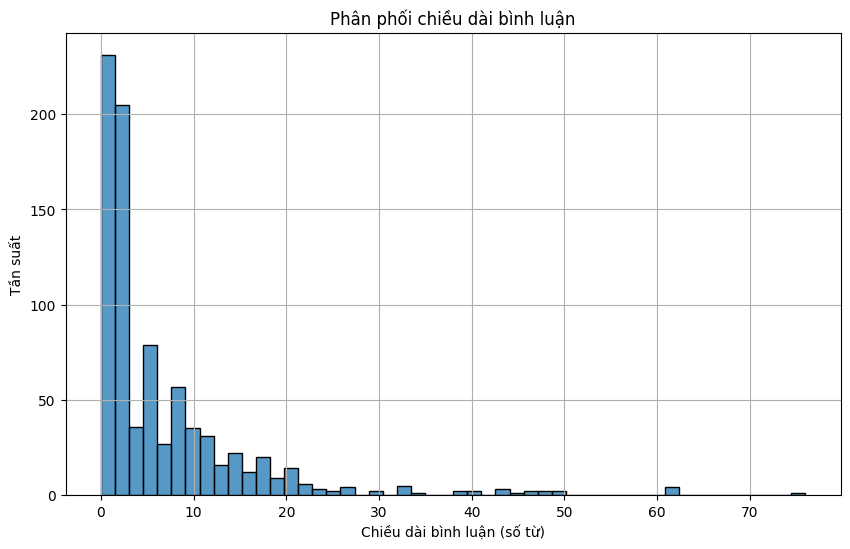

In [5]:
# Bước 1: Tính chiều dài mỗi câu (số từ sau khi xử lý)
df['sentence_length'] = df['clean-text'].apply(lambda x: len(x.split()))

# Bước 2: Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['sentence_length'], bins=50)
plt.title('Phân phối chiều dài bình luận')
plt.xlabel('Chiều dài bình luận (số từ)')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

In [6]:
from collections import Counter
word_count = Counter()
for text in df['clean-text']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)

[('không', 350),
 ('được', 271),
 ('nổi_bật', 132),
 ('tốt', 125),
 ('ổn', 103),
 ('1', 91),
 ('tạm', 79),
 ('ok', 67),
 ('nhanh', 60),
 ('giá', 60)]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# B1: Khởi tạo vectorizer
tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    min_df=2
)

# B2: Huấn luyện & biến đổi dữ liệu
X = tfidf.fit_transform(df['clean-text'])

# B3: In số chiều
print("Số chiều TF-IDF:", X.shape)

# ✅ B4: Chuyển thành DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

# (Tùy chọn) hiển thị nhiều dòng cột
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Xem thử 5 dòng
tfidf_df.sample(5)


Số chiều TF-IDF: (836, 1000)


,10,12,15,15 cm,1500,1500 một,200,200 xu_cua,35,35 40,40,40 to,50,50 cứ,60,60 âm_lượng,ai,ai chơi,ai thic,ai điều_kiện,bass,bass nào,bass toàn,bass yếu,biết,biết được,biếtchất_lượng,bluetooth,bluetooth rẻ,bth,bthg,buồn,bán,bán rẻ,bé,bình,bình thườngtính_năng,bình_thường,bình_thường bền,bình_thường mic,bình_thường volume,bình_thường được,bí,bí để,bí_giọng,bí_giọng nói,bít,bít như_vậy,bít_tai,bít_tai chống,bạn,bản,bảo,bảo thật,bảo_vệ,bật,bật hết,bắt_mắt,bắt_mắt âm,bằng,bằng nửa_bass,bề_ngoài,bề_ngoài tạm,bền,bền không,bịp,bịp nhau,bọc,bọc nhựa,cao,cao_su,cao_su mong,chui,chuẩn_bị,chuẩn_bị thiếu,chx,chán,cháy,cháy thôi_nhạc,chân,chê,chú_ý,chú_ý hơn,chút,chút đeo,chơi,chơi game,chạm,chả,chả tí,chấp_nhận,chấp_nhận được,chất_âm,chậm,chắc,chắc không,chắc_chắn,chỉ,chỉ mang,chỉ được,chỉ để,chịu,chống,chống cháy,chống tiếng,chống ồn,chống ồn_cực,chỗ,chỗ may_tai,chứ,chứ cái,cm,cm cái,coa,coa thêm,cách,cách m50,cách tầm,cái,cái không,cái kẹp,cái nút_tai,cái ok,cái ốp,cái ổn,có_thể,có_vẻ,cóchất_lượng,cả,cảm_giác,cảm_giác bí,cảm_ơn,cảm_ơn người,cầm,cần,cẩn_thận,cẩn_thận hơn,cẩn_thận không,cẩn_thận nhanh,cẩn_thận tai_ngheo,cắm,cắm vào,cố_định,cố_định dây,cỡ,cỡ dở,củ,củ bluetooth,cứ,cứ củ,cứ rè_rè,cứng,cực_chill,cực_chill nhưng_mà,do,dây,dây bọc,dây không,dây ok,dây vành_tai,dù,dễ,dễ rớt,dễ tuột,dở,dở không,fb,fb được,game,game không,giao_hơi,giao_hơi lâu,giá,giá tiền,giá vẫn,giảm,giảm sốc_hộp,giảm âm_lượng,giống,giống_hình,giống_hình sp,giữ,gãy,gãy không,gì,gì không,gì nổi_bật,gì đặc_biệt,gói,gói cẩn_thận,gần,gọn,hay,hay không,huhu,hy_vọng,hy_vọng sử_dụng,hài_lòng,hình,hình_ảnh,hôm,hôm điếc,hơn,hơn tưởng,hơn tưởng_tượng,hơn được,hư,hư không,hư sau,hẳn,hết,hết cỡ,hết volume,hỏng,hộp,hộp đựng,in_ấn,kb,kb sử_dụng,kh,kh được,khác,khác không,khách,khách_quan,khó,khó_chịu,không,không biết,không bình_thường,không bằng,không cóchất_lượng,không cố_định,không gì,không hay,không hài_lòng,không kết_nối,không móp,không mô_tả,không phải,không quen,không rè,không rối,không thích,không thích_hợp,không thế_này,không to,không trầy,không tý,không tại,không tệ,không tốt,không vào,không vỡ_âm,không xài,không ăn_đươc,không đeo,không đáng,không đòi_hỏi,không được,không được_cái,không đứt,không ưng_ý,không ảnh_hưởng,không ổn,không_thể,không_thể trông_đợi,không_thể đòi_hỏi,khỏi,khỏi phải,khỏi tạm,kiểu,kiểu lỗi,kiểu ôm,kiểu_dáng,kiểu_dáng đẹp,kiện,kiện buồn,kèm,kèm beat,kèm lót_tai,kèm để,kém,kêu,kín,kín không,kĩ,kĩ vẫn,kĩ_càng,kĩ_càng cẩn_thận,kĩ_càng ổn,kĩ_hơi,kĩ_hơi lâu,kẹp,kẹp dây,kẹp khác,kẹp phải,kẹp tiện_lợi,kết_nối,kết_nối được,kịp,kịp sài,lap,lap hay,linh_kiện,linh_kiện gì,loa,loa máy,loa nhỏ,lorem,lorem ipsum,loại,loại ok,loại sp,lun,làm,làm gì,làm mất,làm to,làm_ăn,làm_ăn không,làm_ăn kiểu,làm_ăn lừa_đảo,lâu,lâu biết,lâu bền,lâu dã_man,lâu không,lâu tuyệt,lâu tốt,lâu đau_tai,lâu_bù,lâu_bù tại,lâu_cấn,lâu_cấn tay,lâu_dài,lâu_hơi,lâu_hơi đau,lâu_lâu_lâu,lâu_âm_thanh,lâu_âm_thanh nhỏ,lây,lây hạt,lê,lê bảo,lên,lên để,lòng,lòng hay,lót_tai,lót_tai thay_thế,lương,lương hơn,lấn,lấn chất_âm,lấy,lấy kẹp,lấy đúng,lần,lần cấm_tai,lần không,lần mới,lần ok,lần sau,lần đầu,lắp,lắp thêm,lỏng,lỏng_lẻo,lỏng_lẻo không,lỗi,lỗi bán,lỗi không,lớn,lớn nói_chung,lớp,lớp nhựa,lớp suốt,lớp vỏ,lời,lời nhắn_nhủ,lừa_đảo,lựa_chọn,lựa_chọn nhanhh,m50,m50 vânz,ma,ma tạm,mang,mang tc_minh,mang tinh_chat,mang tính_chất,max,max loa,max volume,may,may miếng,may_tai,may_tai không,mic,mic lỗi,mic nói,mic phải,mic rè,mic rè_trừ,mic đcsph,micro,micro nói,minh,minh hoa,mix,mix hết,miếng,miếng giảm,miếng nhựa,miếng đệm,mk,mng,mong,mong lần,mong_muốn,mong_muốn ma,mong_shop,mong_shop sẽ,mong_đợi,mong_đợi tạm,màng,màng nhĩ,màu,màu cái,màu mọi,màu xanh,màu đỏ,máy,máy bànnsndnsndndjssj,máy dây,máy không,máy ngang,máy nha_mng,méo,méo tuy_nhiên,míc,míc lên,míc_thoại,míc_thoại xa,móp,móp hộp,móp không,móp nhiều,móp_méo,móp_méo khó_chịu,móp_méo kiểu,móp_tai,móp_tai ok,mô_tả,mùi,mùi bia,mượt,mượt chắc,mảnh,mảnh dễ,mất,mất mất_tiêu,mất riêng_tư,mất tiếng,mất_tiêu,mất_tiêu không,mấy,mấy bản,mấy không,mấy míc

# DBSCAN

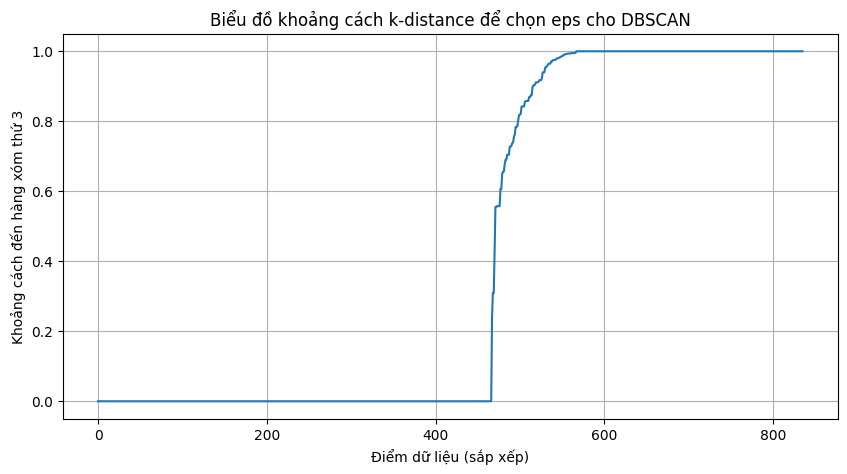

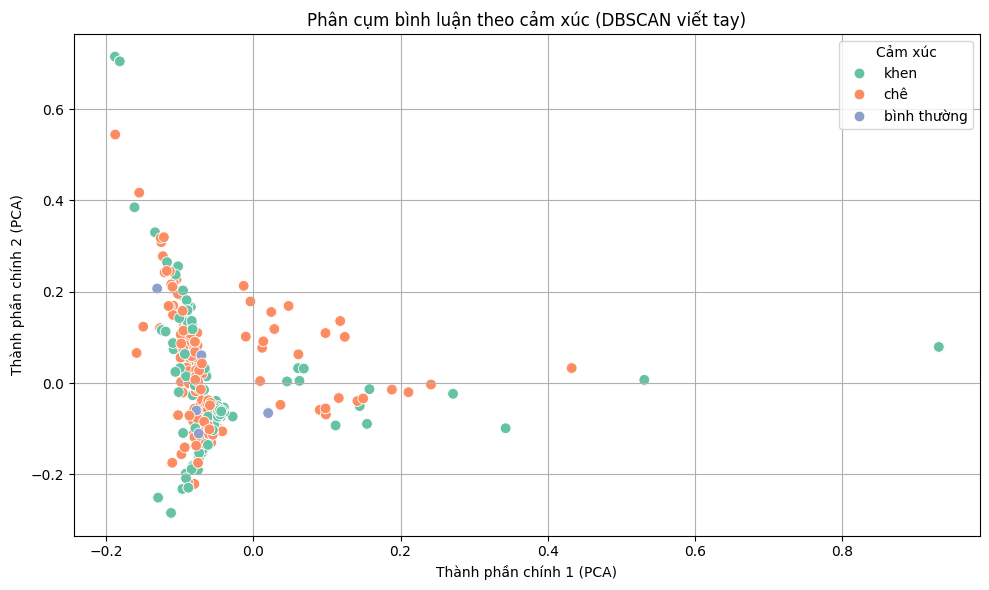

In [8]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

# === TF-IDF từ clean-text đã xử lý trước đó ===
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=2)
X = vectorizer.fit_transform(df['clean-text'])
X_dense = X.toarray()

# === Hàm gợi ý eps bằng biểu đồ khoảng cách k-distance ===
def plot_k_distance(data, min_pts):
    neighbors_model = NearestNeighbors(n_neighbors=min_pts)
    neighbors_model.fit(data)
    distances, indices = neighbors_model.kneighbors(data)

    # Lấy khoảng cách đến hàng xóm thứ min_pts
    k_distances = np.sort(distances[:, min_pts - 1])

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.plot(k_distances)
    plt.title(f'Biểu đồ khoảng cách k-distance để chọn eps cho DBSCAN')
    plt.xlabel('Điểm dữ liệu (sắp xếp)')
    plt.ylabel(f'Khoảng cách đến hàng xóm thứ {min_pts}')
    plt.grid(True)
    plt.show()

# === Gọi hàm để vẽ biểu đồ gợi ý eps ===
plot_k_distance(X_dense, min_pts=3)
# === DBSCAN viết tay ===
def region_query(data, point_idx, eps):
    return [i for i in range(len(data)) if np.linalg.norm(data[point_idx] - data[i]) <= eps]

def expand_cluster(data, labels, point_type, point_idx, neighbors, cluster_id, eps, min_pts):
    labels[point_idx] = cluster_id
    point_type[point_idx] = 'core'
    seeds = neighbors.copy()
    seeds.remove(point_idx)

    while seeds:
        current_point = seeds.pop()
        if labels[current_point] == -1:
            labels[current_point] = cluster_id
            point_type[current_point] = 'border'
        if labels[current_point] == 0:
            labels[current_point] = cluster_id
            current_neighbors = region_query(data, current_point, eps)
            if len(current_neighbors) >= min_pts:
                point_type[current_point] = 'core'
                for n in current_neighbors:
                    if labels[n] in [0, -1] and n not in seeds:
                        seeds.append(n)
            else:
                point_type[current_point] = 'border'

def dbscan(data, eps, min_pts):
    labels = [0] * len(data)
    point_type = [''] * len(data)
    cluster_id = 0
    for i in range(len(data)):
        if labels[i] != 0:
            continue
        neighbors = region_query(data, i, eps)
        if len(neighbors) < min_pts:
            labels[i] = -1
            point_type[i] = 'noise'
        else:
            cluster_id += 1
            expand_cluster(data, labels, point_type, i, neighbors, cluster_id, eps, min_pts)
    return labels, point_type

# === Chạy DBSCAN ===
eps = 1
min_pts = 3
labels_dbscan, point_type = dbscan(X_dense, eps=1, min_pts=3)
df['dbscan_cluster'] = labels_dbscan

# === Gán nhãn cảm xúc ban đầu theo cluster ===
sentiment_map = {
    1: 'khen',
    3: 'chê',
    2: 'chê',
    8: 'chê',
    9: 'chê',
    11: 'khen',
    15: 'khen',
    16: 'bình thường',
    14: 'bình thường',
}
df['sentiment'] = df['dbscan_cluster'].apply(lambda c: sentiment_map.get(c, 'khác'))

# === Rule-based: Chỉ chuyển từ 'khen' sang 'chê' nếu chứa từ tiêu cực ===
negative_keywords = ['lỗi', 'hư', 'kém', 'không', 'tệ', 'sai', 'không kết nối', 'méo', 'rè', 'không nghe', 'đau tai']
def refine_sentiment(row):
    text = row['clean-text']
    current = row['sentiment']
    if current in ['khen', 'bình thường'] and any(neg in text for neg in negative_keywords):
        return 'chê'
    return current

# Nếu trong cụm 1 mà có chứa các từ chê rõ ràng → ép gán lại là 'chê'
def correct_sentiment(row):
    text = row['clean-text']
    cluster = row['dbscan_cluster']
    if cluster == 1 and any(kw in text for kw in ['lỗi', 'hư', 'kém', 'méo', 'đau tai', 'không kết nối']):
        return 'chê'
    return row['sentiment']
df['sentiment'] = df.apply(correct_sentiment, axis=1)


df['sentiment'] = df.apply(refine_sentiment, axis=1)

# === Gộp 'khác' vào 'bình thường' ===
df['sentiment'] = df['sentiment'].replace('khác', 'bình thường')

# === Đảm bảo hiện đầy đủ 3 nhãn cảm xúc ===
df['sentiment'] = pd.Categorical(df['sentiment'], categories=['khen', 'chê', 'bình thường'])

# === Giảm chiều dữ liệu bằng PCA để trực quan hóa ===
X_pca = PCA(n_components=2).fit_transform(X_dense)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# === Vẽ biểu đồ ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df['sentiment'].notna()],
    x='pca1', y='pca2',
    hue='sentiment',
    palette='Set2',
    s=60
)
plt.title("Phân cụm bình luận theo cảm xúc (DBSCAN viết tay)")
plt.xlabel("Thành phần chính 1 (PCA)")
plt.ylabel("Thành phần chính 2 (PCA)")
plt.grid(True)
plt.legend(title="Cảm xúc", loc="best")
plt.tight_layout()
plt.show()




##Nhận xét biểu đồ
- Dựa trên biểu đồ k-distance, giá trị eps = 1.0 là hợp lý vì thể hiện điểm gãy rõ ràng trong phân bố khoảng cách hàng xóm.
- Sau khi áp dụng DBSCAN với min_pts = 3, các cụm cảm xúc được phân tách tương đối tốt.
- Nhóm **"chê"** chiếm ưu thế và lan rộng hơn, trong khi nhóm **"khen"** và **"bình thường"** có xu hướng rõ rệt nhưng vẫn tồn tại giao thoa — điều này phản ánh sự đa dạng về cách người dùng biểu đạt cảm xúc trong đánh giá tai nghe.

# K-medoids


--- CỤM 0 ---
0              nhanh
1                lỗi
2          đáng tiền
3             tạm ổn
4    hư sau vài ngày
Name: clean-text, dtype: object

--- CỤM 1 ---
51     bình_thường
56     bình_thường
83     bình_thường
115    bình_thường
128    bình_thường
Name: clean-text, dtype: object

--- CỤM 2 ---
35             đẹp
70             đẹp
104            đẹp
208    nổi_bật đẹp
290            đẹp
Name: clean-text, dtype: object


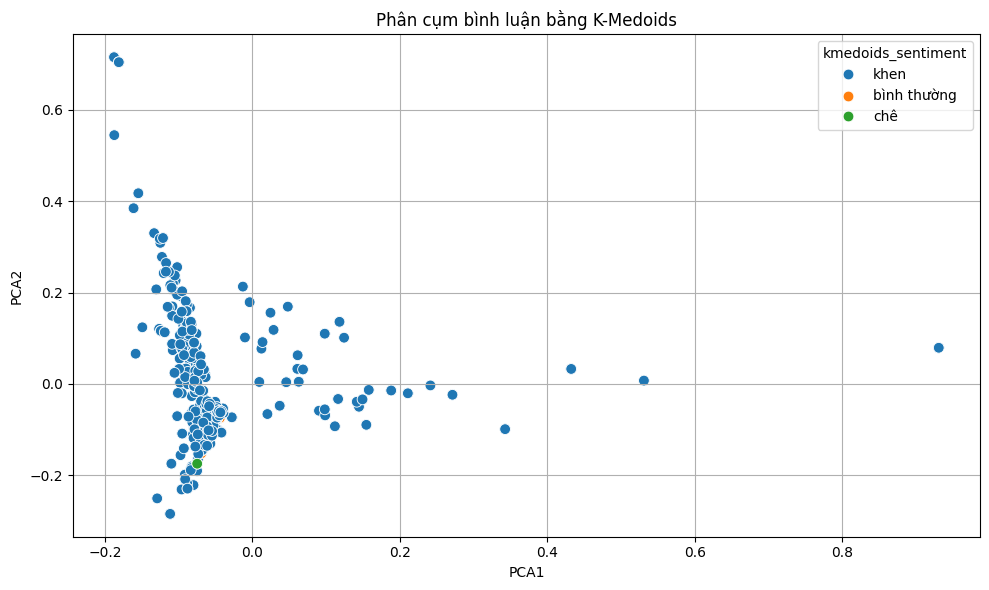

In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2), min_df=2)
X = vectorizer.fit_transform(df['clean-text'])
X_dense = normalize(X.toarray())

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_dense)
df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

class KMedoids:
    def __init__(self, n_clusters=3, random_state=42, max_iter=100):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter

    def fit(self, X):
        np.random.seed(self.random_state)
        n = X.shape[0]
        self.medoid_idx = np.random.choice(n, self.n_clusters, replace=False)

        for _ in range(self.max_iter):
            dist = cdist(X, X[self.medoid_idx])
            labels = np.argmin(dist, axis=1)
            new_medoid_idx = self.medoid_idx.copy()

            for i in range(self.n_clusters):
                idx = np.where(labels == i)[0]
                if len(idx) > 0:
                    sub = X[idx]
                    d = cdist(sub, sub)
                    new_medoid_idx[i] = idx[np.argmin(d.sum(axis=1))]

            if np.all(new_medoid_idx == self.medoid_idx):
                break
            self.medoid_idx = new_medoid_idx

        self.labels_ = labels
        return self

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

kmed = KMedoids(n_clusters=3, random_state=42)
df['kmedoids_cluster'] = kmed.fit_predict(X_dense)

for i in range(3):
    print(f"\n--- CỤM {i} ---")
    print(df[df['kmedoids_cluster']==i]['clean-text'].head(5))

cluster_to_sentiment = {
    0: 'khen',
    1: 'chê',
    2: 'bình thường'
}
df['kmedoids_sentiment'] = df['kmedoids_cluster'].map(cluster_to_sentiment)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='pca1', y='pca2',
    hue='kmedoids_sentiment',
    s=60
)
plt.title("Phân cụm bình luận bằng K-Medoids")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()


K-Medoids phụ thuộc mạnh vào điểm khởi tạo (medoid ban đầu)

# **BIRCH**

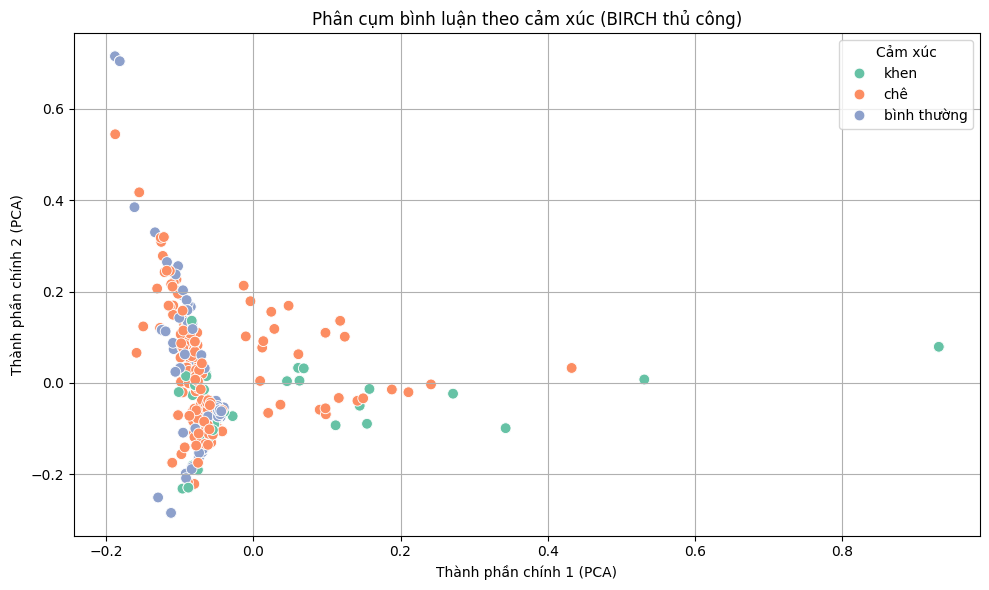

In [23]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns


# === TF-IDF từ clean-text đã xử lý trước đó ===
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=2)
X = vectorizer.fit_transform(df['clean-text'])
X_dense = X.toarray()

# === BIRCH đơn giản viết tay ===
class CFCluster:
    def __init__(self, point):
        self.N = 1
        self.LS = np.array(point)
        self.SS = np.array(point) ** 2
        self.points = [point]

    def update(self, point):
        self.N += 1
        self.LS += point
        self.SS += point ** 2
        self.points.append(point)

    def centroid(self):
        return self.LS / self.N

    def radius(self):
        return np.sqrt(np.sum(self.SS / self.N - (self.LS / self.N) ** 2))

    def distance_to(self, point):
        return np.linalg.norm(self.centroid() - point)

class SimpleBIRCH:
    def __init__(self, threshold=1.0):
        self.threshold = threshold
        self.clusters = []

    def fit(self, X):
        for point in X:
            assigned = False
            for cluster in self.clusters:
                if cluster.distance_to(point) <= self.threshold:
                    cluster.update(point)
                    assigned = True
                    break
            if not assigned:
                self.clusters.append(CFCluster(point))
        return self

    def predict(self, X):
        labels = []
        for point in X:
            dists = [np.linalg.norm(point - c.centroid()) for c in self.clusters]
            if dists:
                labels.append(np.argmin(dists))
            else:
                labels.append(-1)
        return labels

# === Áp dụng BIRCH ===
birch = SimpleBIRCH(threshold=1.0)
birch.fit(X_dense)
labels_birch = birch.predict(X_dense)
df['birch_cluster'] = labels_birch

# === Gán cảm xúc ban đầu theo từ khóa ===
def initial_sentiment(text):
    text = text.lower()
    if any(neg in text for neg in ['lỗi', 'hư', 'kém', 'không', 'tệ', 'sai']):
        return 'chê'
    elif any(pos in text for pos in ['tốt', 'tuyệt_vời', 'đáng tiền', 'ngon','nhanh','cẩn_thận','ok']):
        return 'khen'
    else:
        return 'bình thường'
df['sentiment'] = df['clean-text'].apply(initial_sentiment)

# === Gán lại nếu trong cluster 1 chứa từ tiêu cực mạnh ===
def correct_sentiment(row):
    text = row['clean-text']   # ✅ đúng tên cột
    cluster = row['birch_cluster']
    if cluster == 1 and any(kw in text for kw in ['lỗi', 'hư', 'kém', 'méo', 'đau tai', 'không kết nối','chậm']):
        return 'chê'
    return row['sentiment']

df['sentiment'] = df.apply(correct_sentiment, axis=1)


# === Bổ sung refine theo từ khóa tiêu cực chung ===
negative_keywords = ['lỗi', 'hư', 'kém', 'không', 'tệ', 'sai', 'không kết nối', 'méo', 'rè', 'không nghe', 'đau tai', 'ẩu','lừa_đảo','chậm']
def refine_sentiment(row):
    text = row['clean-text']
    current = row['sentiment']
    if current in ['khen', 'bình thường'] and any(neg in text for neg in negative_keywords):
        return 'chê'
    return current
df['sentiment'] = df.apply(refine_sentiment, axis=1)

# === Gộp 'khác' vào 'bình thường' ===
df['sentiment'] = df['sentiment'].replace('khác', 'bình thường')
df['sentiment'] = pd.Categorical(df['sentiment'], categories=['khen', 'chê', 'bình thường'])

# === Giảm chiều để trực quan hóa ===
X_pca = PCA(n_components=2).fit_transform(X_dense)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# === Vẽ biểu đồ phân cụm ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df['sentiment'].notna()],
    x='pca1', y='pca2',
    hue='sentiment',
    palette='Set2',
    s=60
)
plt.title("Phân cụm bình luận theo cảm xúc (BIRCH thủ công)")
plt.xlabel("Thành phần chính 1 (PCA)")
plt.ylabel("Thành phần chính 2 (PCA)")
plt.grid(True)
plt.legend(title="Cảm xúc", loc="best")
plt.tight_layout()
plt.show()


# **Đánh giá chất lượng của phân cụm**

In [24]:
from sklearn.metrics import silhouette_score

# Dữ liệu TF-IDF
X_dense = X.toarray()

# Tính Silhouette Score cho từng thuật toán
score_dbscan = silhouette_score(X_dense, df['dbscan_cluster'])
score_kmedoids = silhouette_score(X_dense, df['kmedoids_cluster'])
score_birch = silhouette_score(X_dense, df['birch_cluster'])

# In kết quả
print(f"Silhouette Score (DBSCAN): {score_dbscan:.3f}")
print(f"Silhouette Score (K-Medoids): {score_kmedoids:.3f}")
print(f"Silhouette Score (BIRCH): {score_birch:.3f}")

Silhouette Score (DBSCAN): 0.019
Silhouette Score (K-Medoids): 0.038
Silhouette Score (BIRCH): 0.735


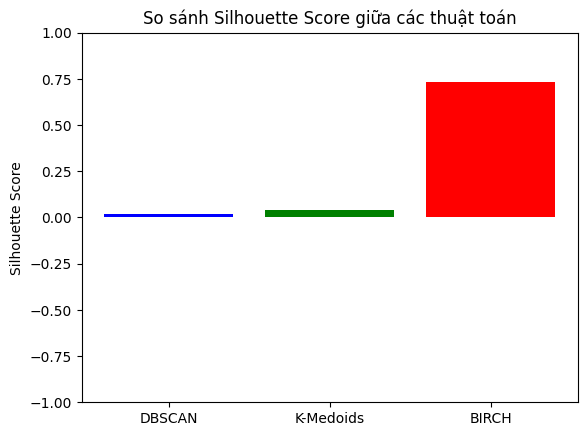

In [25]:
import matplotlib.pyplot as plt

# Danh sách điểm Silhouette Score
scores = [score_dbscan, score_kmedoids, score_birch]
algorithms = ['DBSCAN', 'K-Medoids', 'BIRCH']

# Vẽ biểu đồ
plt.bar(algorithms, scores, color=['blue', 'green', 'red'])
plt.title('So sánh Silhouette Score giữa các thuật toán')
plt.ylabel('Silhouette Score')
plt.ylim(-1, 1)  # Giới hạn trục y từ -1 đến 1
plt.show()

**BIRCH — Tốt nhất:**
Các cụm tạo ra có độ tách biệt rõ ràng.
Các điểm trong mỗi cụm rất gần nhau và xa cụm khác.
Thích hợp với dữ liệu văn bản đã được TF-IDF hóa, có số chiều cao và phân bố thưa.

**K-Medoids — Kém ổn định:**
K-Medoids rất nhạy với cách chọn medoid ban đầu.
Không chuẩn hóa dữ liệu hoặc số chiều cao của TF-IDF có thể làm giảm hiệu quả.

**DBSCAN - Kém ổn định:**
Khó điều chỉnh tham số eps và min_pts.
Hiệu suất giảm với dữ liệu có chiều cao.
Có thể gặp khó khăn với các cụm có mật độ khác nhau.